In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

170508288/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

def load_dataset():
	(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
	train_labels = to_categorical(train_labels)
	test_labels = to_categorical(test_labels)
	return train_images, train_labels, test_images, test_labels

In [4]:
categories = ['airplane' , 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
from matplotlib.cbook import flatten
model = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [6]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss= keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [7]:
train_images_norm = train_images.astype('float32') / 255
test_images_norm = test_images.astype('float32') / 255

In [8]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=10, batch_size=128, validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 15s 18ms/step - loss: 1.9034 - accuracy: 0.3060 - val_loss: 1.6319 - val_accuracy: 0.4158
Epoch 2/10
274/274 [==============================] - 4s 15ms/step - loss: 1.5279 - accuracy: 0.4502 - val_loss: 1.3900 - val_accuracy: 0.4945
Epoch 3/10
274/274 [==============================] - 4s 15ms/step - loss: 1.3493 - accuracy: 0.5209 - val_loss: 1.2783 - val_accuracy: 0.5404
Epoch 4/10
274/274 [==============================] - 4s 15ms/step - loss: 1.2185 - accuracy: 0.5703 - val_loss: 1.1985 - val_accuracy: 0.5789
Epoch 5/10
274/274 [==============================] - 4s 15ms/step - loss: 1.1069 - accuracy: 0.6103 - val_loss: 1.2653 - val_accuracy: 0.5651
Epoch 6/10
274/274 [==============================] - 4s 15ms/step - loss: 1.0186 - accuracy: 0.6434 - val_loss: 1.1092 - val_accuracy: 0.6211
Epoch 7/10
274/274 [==============================] - 4s 15ms/step - loss: 0.9353 - accuracy: 0.6741 - val_loss: 1.1967 - val_accuracy: 0.593

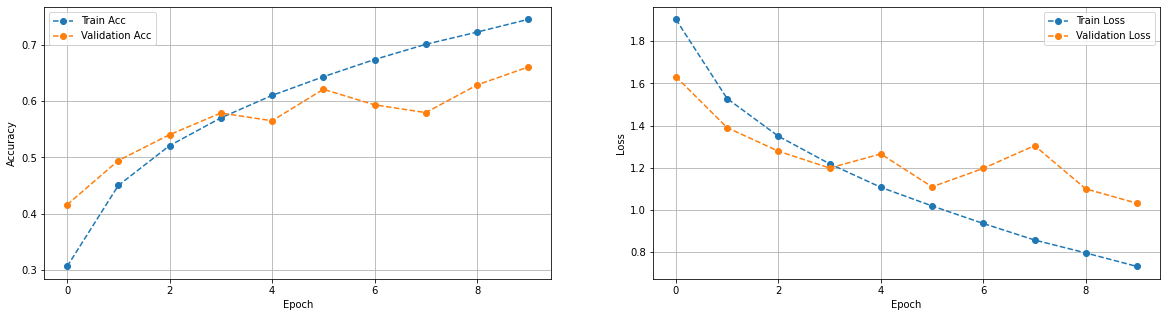

In [9]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [10]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=15, batch_size=128, validation_split=0.3)

Epoch 1/15
274/274 [==============================] - 6s 20ms/step - loss: 0.6692 - accuracy: 0.7678 - val_loss: 1.0673 - val_accuracy: 0.6419
Epoch 2/15
274/274 [==============================] - 4s 16ms/step - loss: 0.6170 - accuracy: 0.7848 - val_loss: 1.2049 - val_accuracy: 0.6201
Epoch 3/15
274/274 [==============================] - 5s 18ms/step - loss: 0.5615 - accuracy: 0.8050 - val_loss: 1.0480 - val_accuracy: 0.6668
Epoch 4/15
274/274 [==============================] - 4s 15ms/step - loss: 0.5079 - accuracy: 0.8227 - val_loss: 1.1581 - val_accuracy: 0.6566
Epoch 5/15
274/274 [==============================] - 4s 15ms/step - loss: 0.4635 - accuracy: 0.8379 - val_loss: 1.1316 - val_accuracy: 0.6695
Epoch 6/15
274/274 [==============================] - 4s 15ms/step - loss: 0.4182 - accuracy: 0.8531 - val_loss: 1.4609 - val_accuracy: 0.6338
Epoch 7/15
274/274 [==============================] - 5s 17ms/step - loss: 0.3753 - accuracy: 0.8677 - val_loss: 1.3903 - val_accuracy: 0.6331

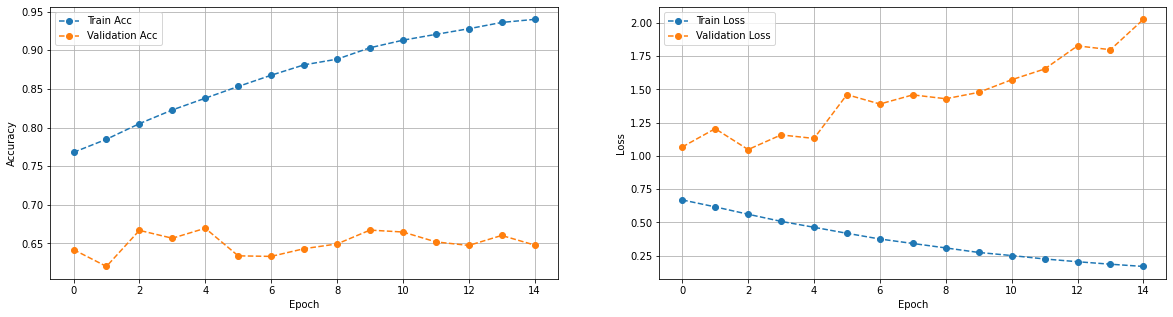

In [11]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [12]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=20, batch_size=128, validation_split=0.3)

Epoch 1/20
274/274 [==============================] - 4s 16ms/step - loss: 0.1600 - accuracy: 0.9445 - val_loss: 1.8827 - val_accuracy: 0.6655
Epoch 2/20
274/274 [==============================] - 5s 18ms/step - loss: 0.1456 - accuracy: 0.9496 - val_loss: 2.2320 - val_accuracy: 0.6567
Epoch 3/20
274/274 [==============================] - 4s 15ms/step - loss: 0.1455 - accuracy: 0.9499 - val_loss: 2.0605 - val_accuracy: 0.6685
Epoch 4/20
274/274 [==============================] - 4s 16ms/step - loss: 0.1325 - accuracy: 0.9540 - val_loss: 2.3067 - val_accuracy: 0.6431
Epoch 5/20
274/274 [==============================] - 4s 15ms/step - loss: 0.1257 - accuracy: 0.9563 - val_loss: 2.2660 - val_accuracy: 0.6605
Epoch 6/20
274/274 [==============================] - 4s 15ms/step - loss: 0.1234 - accuracy: 0.9581 - val_loss: 2.2124 - val_accuracy: 0.6649
Epoch 7/20
274/274 [==============================] - 5s 18ms/step - loss: 0.1143 - accuracy: 0.9598 - val_loss: 2.4227 - val_accuracy: 0.6570

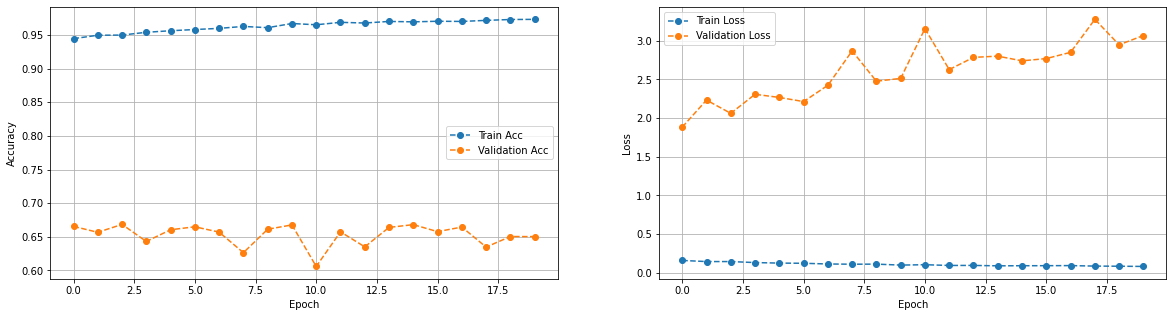

In [13]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [14]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=25, batch_size=128, validation_split=0.3)

Epoch 1/25
274/274 [==============================] - 5s 17ms/step - loss: 0.0846 - accuracy: 0.9742 - val_loss: 3.5031 - val_accuracy: 0.6331
Epoch 2/25
274/274 [==============================] - 4s 15ms/step - loss: 0.0824 - accuracy: 0.9735 - val_loss: 3.3114 - val_accuracy: 0.6559
Epoch 3/25
274/274 [==============================] - 4s 15ms/step - loss: 0.0825 - accuracy: 0.9747 - val_loss: 3.0934 - val_accuracy: 0.6657
Epoch 4/25
274/274 [==============================] - 5s 18ms/step - loss: 0.0845 - accuracy: 0.9729 - val_loss: 3.1748 - val_accuracy: 0.6559
Epoch 5/25
274/274 [==============================] - 4s 15ms/step - loss: 0.0756 - accuracy: 0.9755 - val_loss: 3.3232 - val_accuracy: 0.6636
Epoch 6/25
274/274 [==============================] - 4s 15ms/step - loss: 0.0814 - accuracy: 0.9756 - val_loss: 3.0791 - val_accuracy: 0.6673
Epoch 7/25
274/274 [==============================] - 5s 17ms/step - loss: 0.0750 - accuracy: 0.9768 - val_loss: 3.3818 - val_accuracy: 0.6539

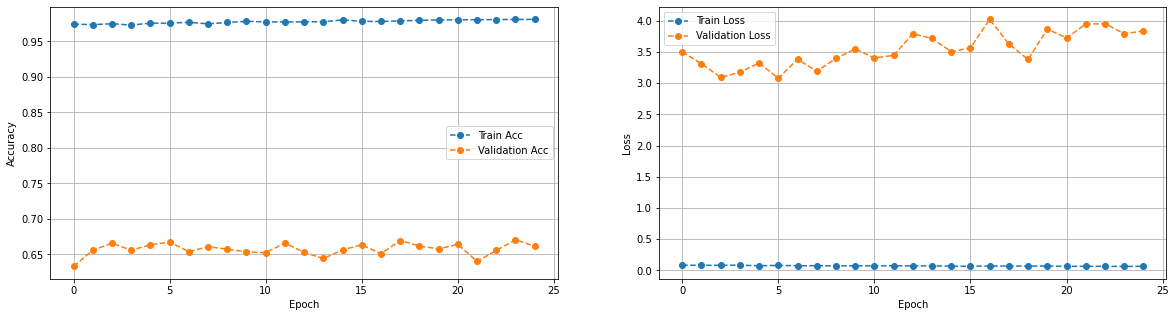

In [15]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [16]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=30, batch_size=128, validation_split=0.3)

Epoch 1/30
274/274 [==============================] - 4s 16ms/step - loss: 0.0631 - accuracy: 0.9823 - val_loss: 4.2503 - val_accuracy: 0.6504
Epoch 2/30
274/274 [==============================] - 4s 15ms/step - loss: 0.0619 - accuracy: 0.9813 - val_loss: 3.7597 - val_accuracy: 0.6675
Epoch 3/30
274/274 [==============================] - 4s 15ms/step - loss: 0.0646 - accuracy: 0.9816 - val_loss: 3.8611 - val_accuracy: 0.6575
Epoch 4/30
274/274 [==============================] - 5s 17ms/step - loss: 0.0636 - accuracy: 0.9824 - val_loss: 4.1029 - val_accuracy: 0.6630
Epoch 5/30
274/274 [==============================] - 4s 15ms/step - loss: 0.0698 - accuracy: 0.9811 - val_loss: 4.1315 - val_accuracy: 0.6583
Epoch 6/30
274/274 [==============================] - 4s 15ms/step - loss: 0.0614 - accuracy: 0.9823 - val_loss: 4.0364 - val_accuracy: 0.6607
Epoch 7/30
274/274 [==============================] - 4s 15ms/step - loss: 0.0620 - accuracy: 0.9819 - val_loss: 4.0760 - val_accuracy: 0.6584

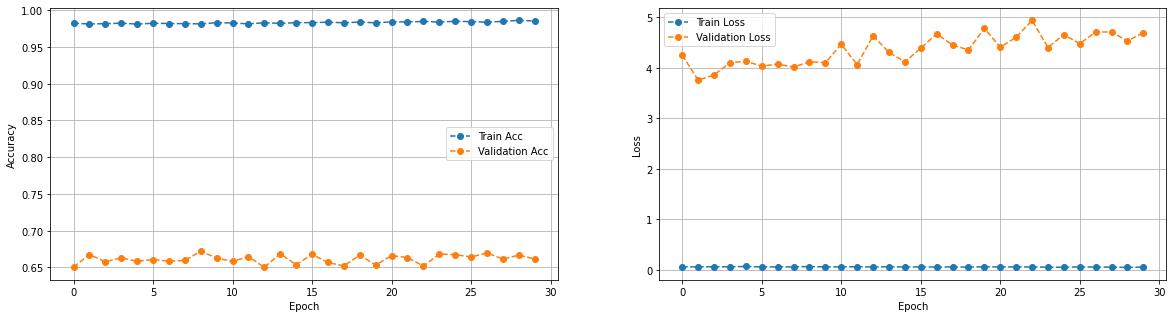

In [17]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [18]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=35, batch_size=128, validation_split=0.3)

Epoch 1/35
274/274 [==============================] - 5s 17ms/step - loss: 0.0545 - accuracy: 0.9849 - val_loss: 4.7742 - val_accuracy: 0.6635
Epoch 2/35
274/274 [==============================] - 5s 18ms/step - loss: 0.0595 - accuracy: 0.9842 - val_loss: 4.7721 - val_accuracy: 0.6697
Epoch 3/35
274/274 [==============================] - 5s 18ms/step - loss: 0.0585 - accuracy: 0.9848 - val_loss: 4.7933 - val_accuracy: 0.6687
Epoch 4/35
274/274 [==============================] - 5s 17ms/step - loss: 0.0544 - accuracy: 0.9847 - val_loss: 4.6483 - val_accuracy: 0.6654
Epoch 5/35
274/274 [==============================] - 5s 18ms/step - loss: 0.0554 - accuracy: 0.9856 - val_loss: 4.8357 - val_accuracy: 0.6631
Epoch 6/35
274/274 [==============================] - 4s 15ms/step - loss: 0.0553 - accuracy: 0.9860 - val_loss: 4.8030 - val_accuracy: 0.6675
Epoch 7/35
274/274 [==============================] - 5s 18ms/step - loss: 0.0603 - accuracy: 0.9851 - val_loss: 4.8083 - val_accuracy: 0.6603

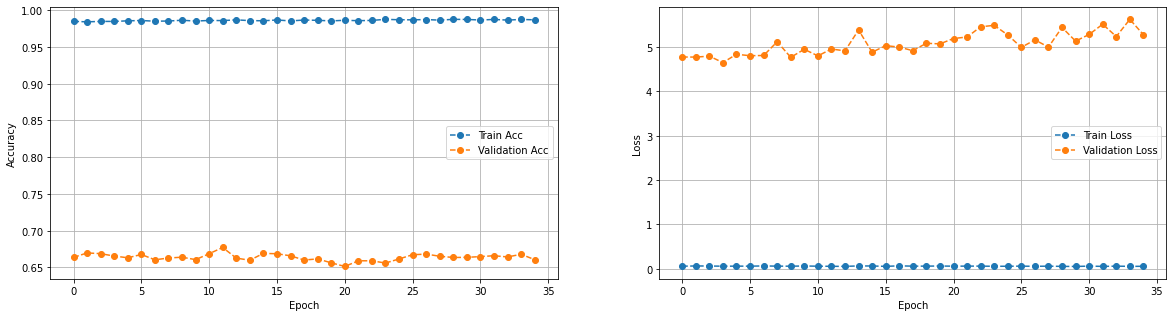

In [19]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [20]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=40, batch_size=128, validation_split=0.3)

Epoch 1/40
274/274 [==============================] - 5s 19ms/step - loss: 0.0544 - accuracy: 0.9869 - val_loss: 5.3754 - val_accuracy: 0.6691
Epoch 2/40
274/274 [==============================] - 4s 15ms/step - loss: 0.0569 - accuracy: 0.9869 - val_loss: 5.3426 - val_accuracy: 0.6673
Epoch 3/40
274/274 [==============================] - 5s 18ms/step - loss: 0.0551 - accuracy: 0.9874 - val_loss: 5.3084 - val_accuracy: 0.6627
Epoch 4/40
274/274 [==============================] - 4s 16ms/step - loss: 0.0484 - accuracy: 0.9880 - val_loss: 5.6153 - val_accuracy: 0.6616
Epoch 5/40
274/274 [==============================] - 5s 18ms/step - loss: 0.0560 - accuracy: 0.9870 - val_loss: 5.3425 - val_accuracy: 0.6484
Epoch 6/40
274/274 [==============================] - 5s 18ms/step - loss: 0.0526 - accuracy: 0.9873 - val_loss: 5.2847 - val_accuracy: 0.6751
Epoch 7/40
274/274 [==============================] - 5s 18ms/step - loss: 0.0518 - accuracy: 0.9878 - val_loss: 6.0481 - val_accuracy: 0.6485

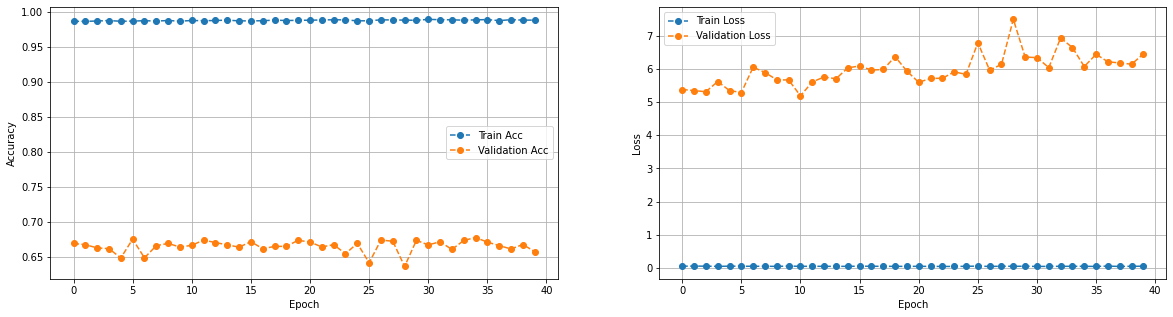

In [21]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [22]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=45, batch_size=128, validation_split=0.3)

Epoch 1/45
274/274 [==============================] - 5s 17ms/step - loss: 0.0506 - accuracy: 0.9889 - val_loss: 6.4143 - val_accuracy: 0.6645
Epoch 2/45
274/274 [==============================] - 4s 15ms/step - loss: 0.0459 - accuracy: 0.9899 - val_loss: 6.5412 - val_accuracy: 0.6689
Epoch 3/45
274/274 [==============================] - 5s 17ms/step - loss: 0.0495 - accuracy: 0.9894 - val_loss: 6.7567 - val_accuracy: 0.6622
Epoch 4/45
274/274 [==============================] - 4s 15ms/step - loss: 0.0517 - accuracy: 0.9885 - val_loss: 5.8862 - val_accuracy: 0.6704
Epoch 5/45
274/274 [==============================] - 5s 17ms/step - loss: 0.0431 - accuracy: 0.9902 - val_loss: 6.5608 - val_accuracy: 0.6694
Epoch 6/45
274/274 [==============================] - 4s 15ms/step - loss: 0.0552 - accuracy: 0.9891 - val_loss: 6.6274 - val_accuracy: 0.6629
Epoch 7/45
274/274 [==============================] - 4s 15ms/step - loss: 0.0450 - accuracy: 0.9895 - val_loss: 7.3074 - val_accuracy: 0.6611

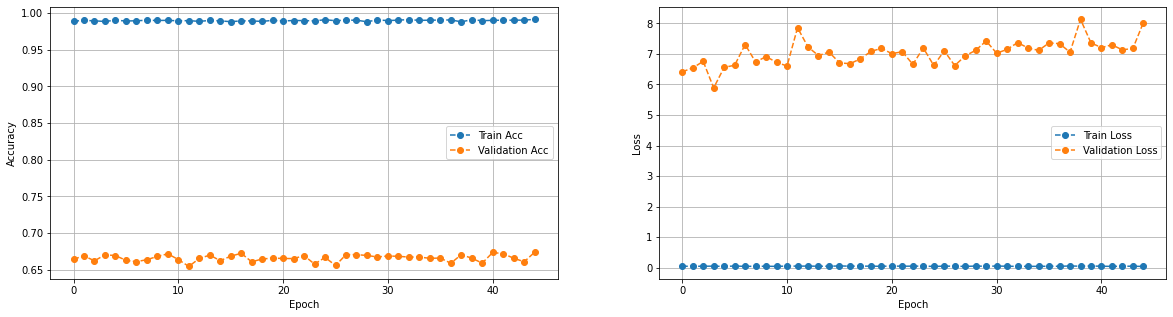

In [23]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [24]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=50, batch_size=128, validation_split=0.3)

Epoch 1/50
274/274 [==============================] - 5s 20ms/step - loss: 0.0517 - accuracy: 0.9900 - val_loss: 7.5854 - val_accuracy: 0.6645
Epoch 2/50
274/274 [==============================] - 4s 15ms/step - loss: 0.0456 - accuracy: 0.9909 - val_loss: 7.6922 - val_accuracy: 0.6657
Epoch 3/50
274/274 [==============================] - 4s 15ms/step - loss: 0.0510 - accuracy: 0.9904 - val_loss: 7.4069 - val_accuracy: 0.6635
Epoch 4/50
274/274 [==============================] - 4s 15ms/step - loss: 0.0481 - accuracy: 0.9905 - val_loss: 7.0370 - val_accuracy: 0.6672
Epoch 5/50
274/274 [==============================] - 4s 15ms/step - loss: 0.0443 - accuracy: 0.9906 - val_loss: 7.6865 - val_accuracy: 0.6683
Epoch 6/50
274/274 [==============================] - 4s 15ms/step - loss: 0.0571 - accuracy: 0.9900 - val_loss: 7.7267 - val_accuracy: 0.6615
Epoch 7/50
274/274 [==============================] - 4s 15ms/step - loss: 0.0398 - accuracy: 0.9917 - val_loss: 7.6977 - val_accuracy: 0.6725

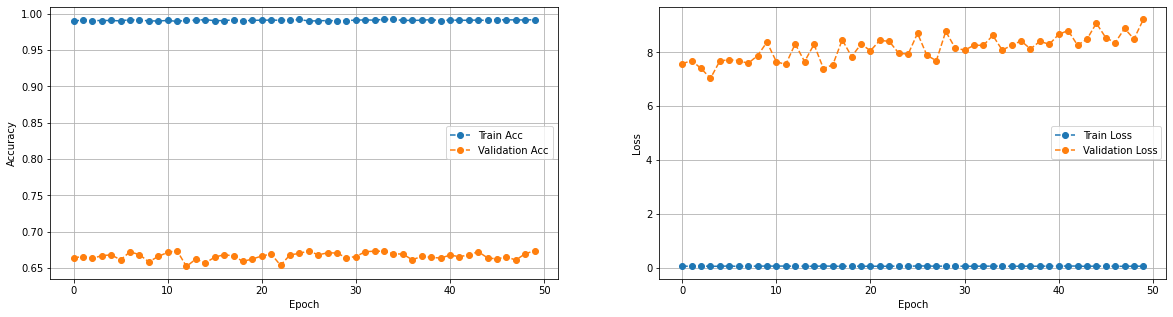

In [25]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()